In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


# Dataset Loading

In [2]:
df=pd.read_csv("../input/glass/glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2.Data Preprocessing

In [4]:
#checking data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#checking null values
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
#checking Over of data distribution
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 3. Data Visulization

<AxesSubplot:xlabel='Type', ylabel='count'>

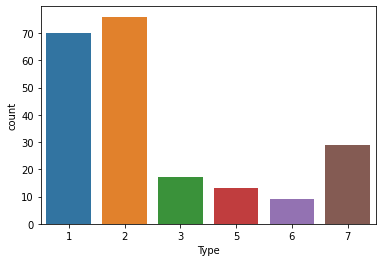

In [7]:
sns.countplot(x=df['Type'])

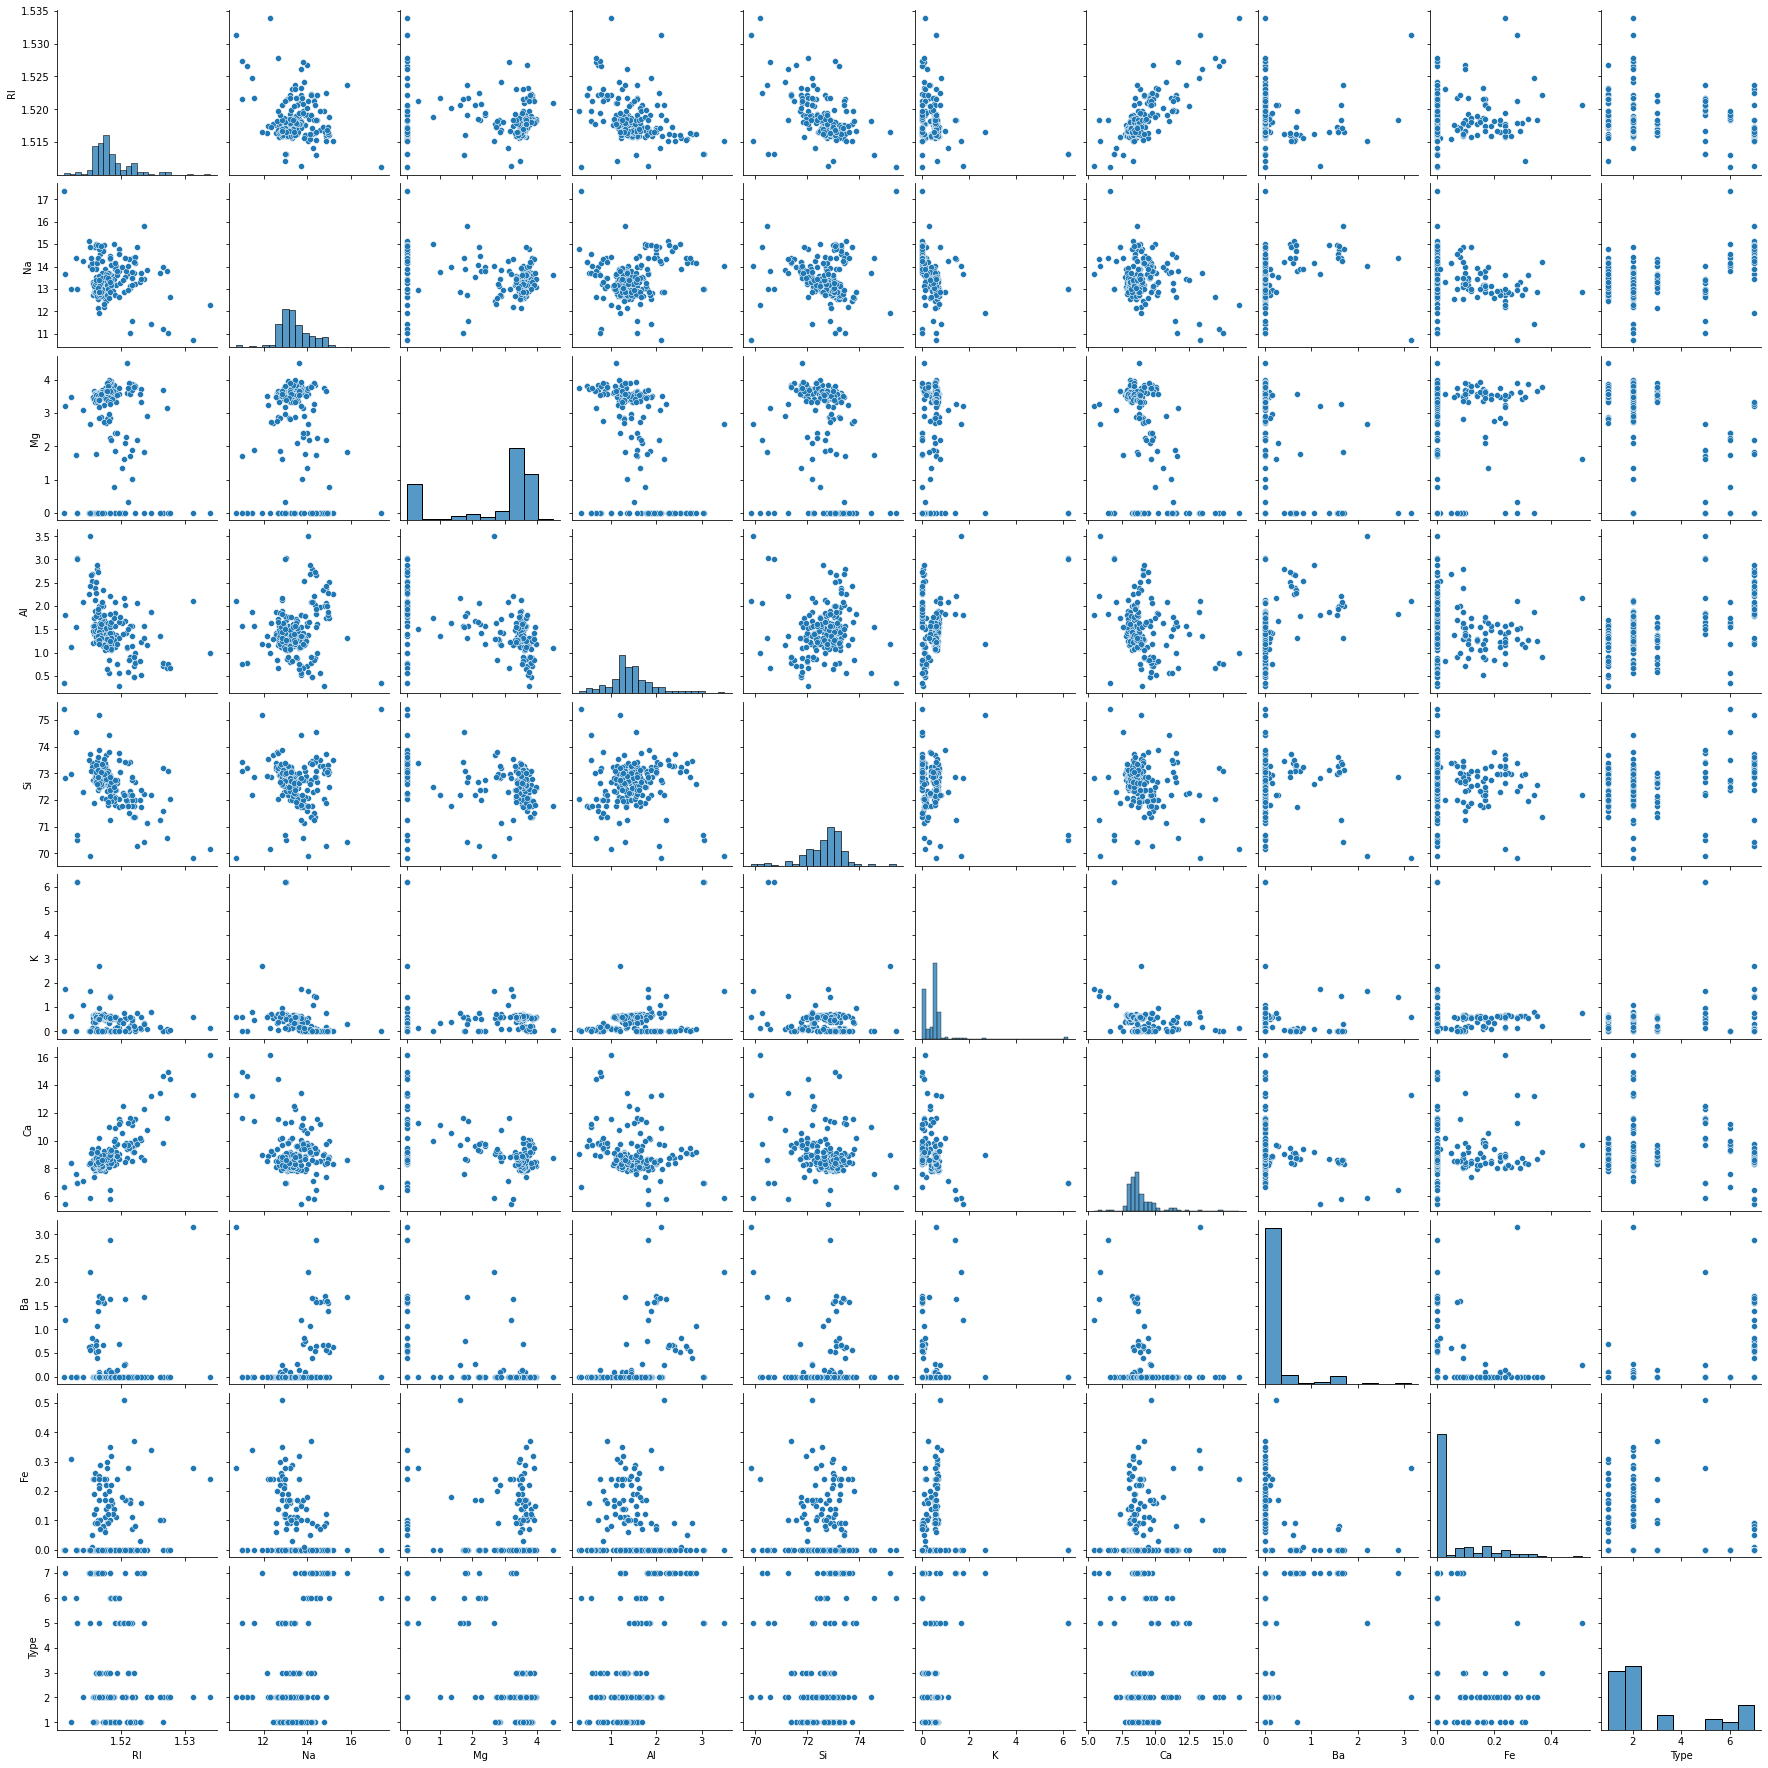

In [8]:
sns.pairplot(df)

<AxesSubplot:>

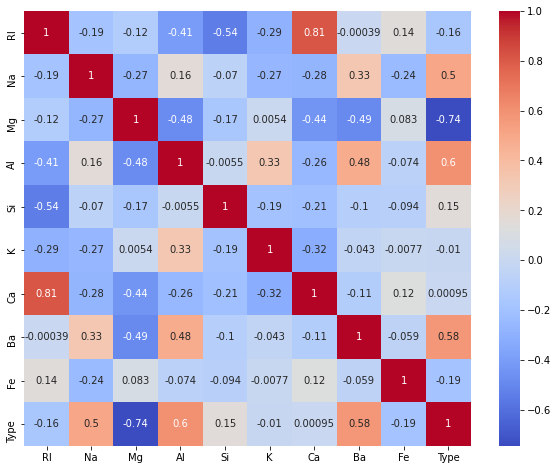

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

From above graph <br>
Positive corelated column: Ca-Rl<br>
Negative corelated column: mg-Type

In [10]:
# Separating Features and Label
x=df.drop(columns=['Type'])
y=df['Type']

In [11]:
# splitting dataset in train data and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

# 4.Classification Models

## 4.1 Logistic Regression

In [12]:
# as accuracy is very less we use scalling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale_xtrain=scale.fit_transform(xtrain)
scale_xtest=scale.fit_transform(xtest)

In [13]:
# training and fitting model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(scale_xtrain,ytrain)
ypred=model.predict(scale_xtest)

Accuracy Score is: 0.813953488372093
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.78      0.82      0.80        17
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.81        43
   macro avg       0.70      0.65      0.66        43
weighted avg       0.78      0.81      0.79        43



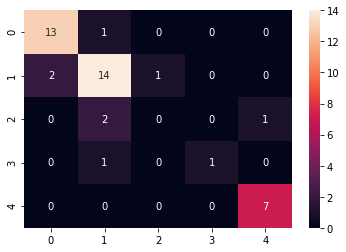

In [14]:
# Evaluation of Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lg_acc=accuracy_score(ytest,ypred)
print("Accuracy Score is:",lg_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.2 KNN  (k-nearest neighbors)

In [15]:
# training and fitting model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy Score is: 0.7674418604651163
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.80      0.71      0.75        17
           3       0.00      0.00      0.00         0
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.86      0.86      0.86         7

    accuracy                           0.77        43
   macro avg       0.65      0.60      0.62        43
weighted avg       0.79      0.77      0.78        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


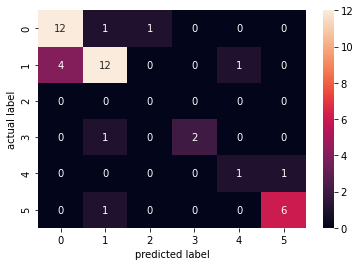

In [16]:
# Evaluation of Model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
knn_acc=accuracy_score(ytest,ypred)
print("Accuracy Score is:",knn_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))
plt.ylabel('actual label')
plt.xlabel('predicted label')

plt.show()

## 4.3 SVC Support Vector Classifier

In [17]:
# training and fitting model
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(scale_xtrain,ytrain)
ypred=model.predict(scale_xtest)

Accuracy is: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.82      0.82      0.82        17
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.84        43
   macro avg       0.71      0.75      0.73        43
weighted avg       0.80      0.84      0.82        43



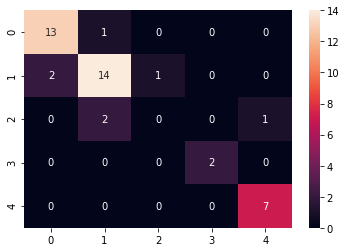

In [18]:
# Evaluation of Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
svc_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",svc_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.4 Naive Byes

In [19]:
# training and fitting model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.4883720930232558
              precision    recall  f1-score   support

           1       0.45      0.71      0.56        14
           2       0.50      0.12      0.19        17
           3       0.00      0.00      0.00         0
           5       0.33      0.33      0.33         3
           6       1.00      0.50      0.67         2
           7       0.78      1.00      0.88         7

    accuracy                           0.49        43
   macro avg       0.51      0.44      0.44        43
weighted avg       0.54      0.49      0.45        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


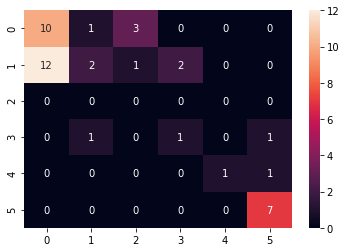

In [20]:
# Evaluation of Model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
GNB_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",GNB_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.5 Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.7441860465116279
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.81      0.76      0.79        17
           3       0.00      0.00      0.00         0
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.74        43
   macro avg       0.49      0.48      0.48        43
weighted avg       0.74      0.74      0.74        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


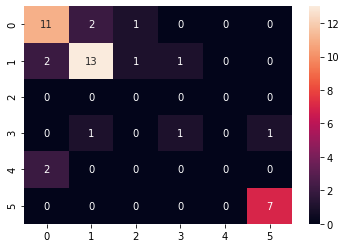

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
Dt_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",Dt_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.6 Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8837209302325582
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      0.88      0.88        17
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.88        43
   macro avg       0.84      0.74      0.77        43
weighted avg       0.88      0.88      0.87        43



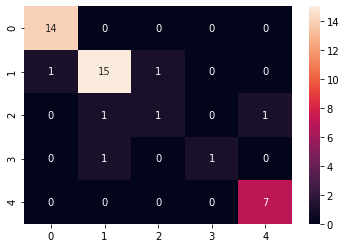

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
RFC_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",RFC_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.7 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.9069767441860465
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.88      0.94        17
           3       0.00      0.00      0.00         0
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.78      1.00      0.88         7

    accuracy                           0.91        43
   macro avg       0.74      0.67      0.69        43
weighted avg       0.94      0.91      0.92        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


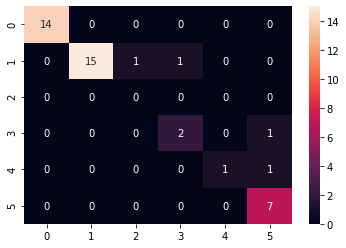

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
GBC_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",GBC_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.8 AdaBoost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=5)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.4186046511627907
              precision    recall  f1-score   support

           1       0.44      0.86      0.59        14
           2       0.25      0.18      0.21        17
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       0.67      0.29      0.40         7

    accuracy                           0.42        43
   macro avg       0.47      0.36      0.37        43
weighted avg       0.40      0.42      0.37        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


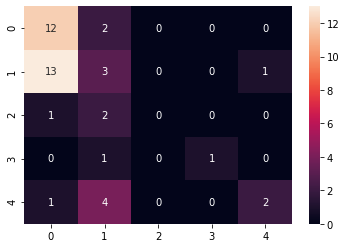

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ABC_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",ABC_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.9 XG Boost Classifier

In [29]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

[04:56:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy is: 0.9534883720930233
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        17
           3       0.00      0.00      0.00         0
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.95        43
   macro avg       0.81      0.77      0.78        43
weighted avg       0.98      0.95      0.96        43



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


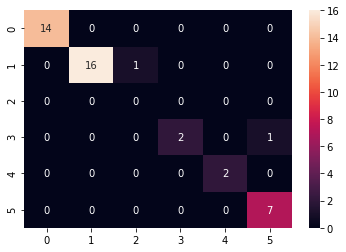

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
XGB_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",XGB_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## 4.10 Voting

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
models=[
    #("lr",LogisticRegression()),
    ("knn",KNeighborsClassifier(n_neighbors=5)),
    ("GNB",GaussianNB()),
    ("RF",RandomForestClassifier(n_estimators=50)),
    ('ABC',AdaBoostClassifier(n_estimators=50)),
    ('GBC',GradientBoostingClassifier(n_estimators=50)),
    ('SVM',SVC(C=0.1,probability=True))
]

In [32]:
# # training and fitting model
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting="soft")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8837209302325582
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        17
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.78      1.00      0.88         7

    accuracy                           0.88        43
   macro avg       0.86      0.80      0.81        43
weighted avg       0.90      0.88      0.88        43



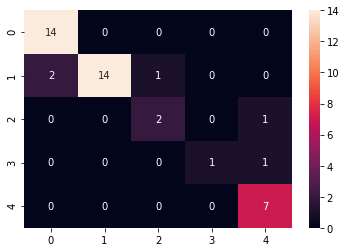

In [33]:
# Evaluation of Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
voting_acc=accuracy_score(ytest,ypred)
print("Accuracy is:",voting_acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# 5. Accuracy of different Model

In [34]:
models=[("LogisticRegression",lg_acc),
    ("KNeighborsClassifier",knn_acc),
        ("SVM",svc_acc),
        ("DecisionTree",Dt_acc),
        ("GuessinNB",GNB_acc),
        ("RanodmForest",RFC_acc),
        ("Gradientboost",GBC_acc),
        ("AdaBoost",ABC_acc),
        ("XGboost",XGB_acc),
        ("Voting",voting_acc)
]

In [35]:
predict = pd.DataFrame(data = models, columns=['Model', "Accuracy"])
predict

,Model,Accuracy
0,LogisticRegression,0.813953
1,KNeighborsClassifier,0.767442
2,SVM,0.837209
3,DecisionTree,0.744186
4,GuessinNB,0.488372
5,RanodmForest,0.883721
6,Gradientboost,0.906977
7,AdaBoost,0.418605
8,XGboost,0.953488
9,Voting,0.883721


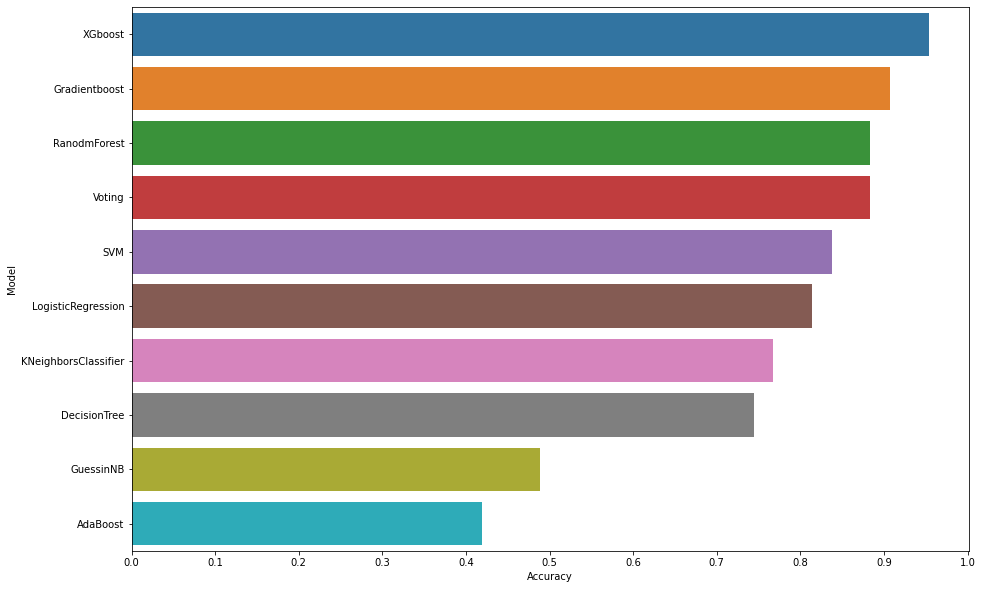

In [36]:
# plogttin bargraph of r2score of each model
f, axe = plt.subplots(1,1, figsize=(15,10))
predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predict, ax = axe)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

### This  graph clearly shows the XGboost model gives higher accuracy compare to other model.

# 6. Conclusion
In this activity I have explored the different classification models. Then visulized and measured performance of models.

<center>                               ****** END******  <center>